# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann - 2018 - 2020; O. Kaufmann & Q. Campeol, 2022-2023.
## Séance 5

***
## 1. Chargement des packages

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.1 Imports</b>
</div>

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

In [2]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import rpy2

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.2 Installer et charger les packages <i>raster</i>, <i>rgdal</i> et <i>gstat</i> </b>
</div>

- Si nécessaire, installez les <b>packages</b> manquants

install.packages(c('sp', 'gstat'))

- Chargez les <b>packages</b> <i>sp</i>, <i>raster</i> et <i>gstat</i>

In [3]:
%%R

library(sp)
library(raster)
library(gstat)

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


<div class="alert alert-block alert-info">
<b>Info:</b><br>     La documentation de gstat est accessible <a href="http://cran.r-project.org/web/packages/gstat/gstat.pdf">ici</a>.
</div>

***
## 2. Rappel TP4 : chargement et mise en forme du jeu de données <i>Robena Mine (US, Penn) coal ash</i> 
### Jeu de données contenu dans le package <i>gstat</i>
Data obtained from Gomez and Hazen (1970, Tables 19 and 20) on coal ash for the Robena Mine Property in Greene County Pennsylvania.

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.1 Charger le jeu de données</b>
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.2 Supprimer le déviant et créer un nouveau jeu de données nommé 'robena'</b>
</div>

In [ ]:
# Résultat attendu ci-dessous...

Variance avant suppression du déviant : 1.629%²
Variance après suppression du déviant : 1.338%²


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.3 Créer des **SpatialPointsDataFrames** à partir des jeux de données robena et coalash et afficher sous forme de carte</b>
</div>

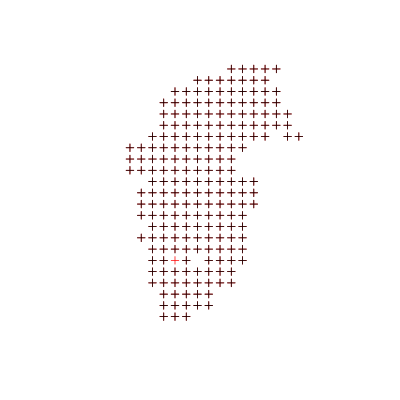

In [ ]:
# Résultat attendu ci-dessous...

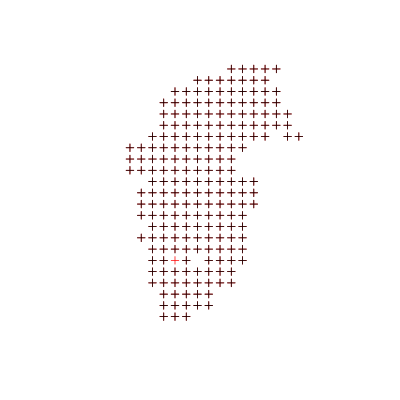  
~~~<IPython.core.display.Image object>~~~  


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.4 Créer des **géodataframes** à partir des jeux de données robena et coalash et afficher sous forme de carte</b>
</div>

<Axes: >

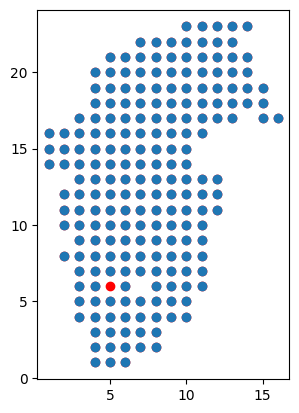

In [ ]:
# Résultat attendu ci-dessous...

~~~<Axes: >~~~  
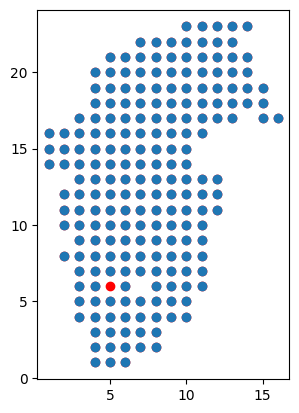  
~~~<Figure size 640x480 with 1 Axes>~~~  


***
## 3. Préparation des outils pour la représentation des résultats sur carte

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>3.1 Charger la grille pour les prédictions créée à la séance précédente</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <b>open</b> de la librairie <code>Rasterio</code>
</div>

- Représentez sur une même figure les points d'échantillonnage et la grille d'évaluation

<Axes: >

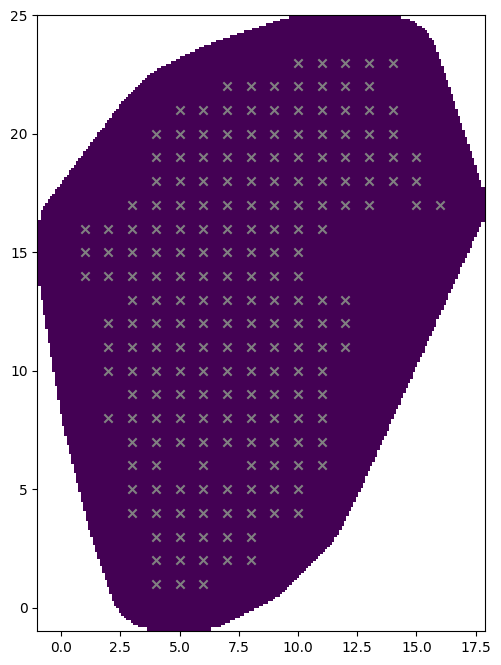

In [ ]:
# Résultat attendu ci-dessous...

~~~<Axes: >~~~  
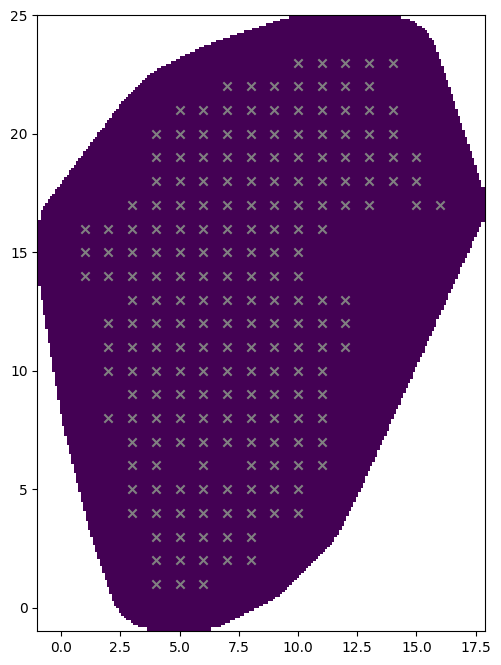  
~~~<Figure size 800x800 with 1 Axes>~~~  


***
## 4. Calculer le variogramme expérimental et ajuster un modèle de variogramme théorique

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Examinez ce que font les fonctions <i>variogram</i> et <i>vgm</i> du <b>package</b> <i>gstat</i>
</div>

In [10]:
%%R

?variogram

File: /tmp/Rtmp3ZC8Pc/Rtxt9f025b7b5d3e
variogram                package:gstat                 R Documentation



Calculate Sample or Residual Variogram or Variogram Cloud



Description:



     Calculates the sample variogram from data, or in case of a linear

     model is given, for the residuals, with options for directional,

     robust, and pooled variogram, and for irregular distance

     intervals.



     In case spatio-temporal data is provided, the function

     ‘variogramST’ is called with a different set of parameters.



Usage:



     ## S3 method for class 'gstat'

     variogram(object, ...)

     ## S3 method for class 'formula'

     variogram(object, locations = coordinates(data), data, ...)

     ## Default S3 method:

     variogram(object, locations, X, cutoff, width = cutoff/15,

             alpha = 0, beta = 0, tol.hor = 90/length(alpha), tol.ver =

             90/length(beta), cressie = FALSE, dX = numeric(0), boundaries =

             numeric(0), cloud 

In [11]:
%%R
?vgm

File: /tmp/Rtmp3ZC8Pc/Rtxt9f02601f436b
vgm                   package:gstat                    R Documentation



Generate, or Add to Variogram Model



Description:



     Generates a variogram model, or adds to an existing model.

     ‘print.variogramModel’ prints the essence of a variogram model.



Usage:



     vgm(psill = NA, model, range = NA, nugget, add.to, anis, kappa = 0.5, ..., covtable,

             Err = 0)

     ## S3 method for class 'variogramModel'

     print(x, ...)

     ## S3 method for class 'variogramModel'

     plot(x, cutoff, ..., type = 'l')

     as.vgm.variomodel(m)

     

Arguments:



   psill: (partial) sill of the variogram model component, or model:

          see Details



   model: model type, e.g. "Exp", "Sph", "Gau", "Mat". Calling vgm()

          without a model argument returns a data.frame with available

          models.



   range: range parameter of the variogram model component; in case of

          anisotropy: major range



   ka

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.1 Calculer le variogramme expérimental</b>
</div>

- Calculez le variogramme expérimental pour le jeu de données robena et affichez-le

     np     dist     gamma dir.hor dir.ver   id
1   365 1.000000 0.9116238       0       0 var1
2   346 1.414214 0.9754467       0       0 var1
3   964 2.155746 0.9927252       0       0 var1
4   296 2.828427 1.0243694       0       0 var1
5   861 3.107620 1.0080100       0       0 var1
6  1308 3.885550 1.0809427       0       0 var1
7   733 4.394176 1.0720051       0       0 var1
8  1129 5.039643 1.1894792       0       0 var1
9  1034 5.611912 1.2688307       0       0 var1
10 1335 6.226178 1.3514909       0       0 var1
11 1012 6.934132 1.3075510       0       0 var1
12  934 7.363933 1.3622869       0       0 var1
13 1235 8.038788 1.3004568       0       0 var1
14  604 8.554835 1.4186204       0       0 var1


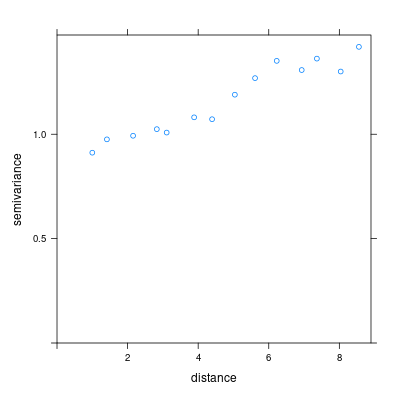

In [ ]:
# Résultat attendu ci-dessous...

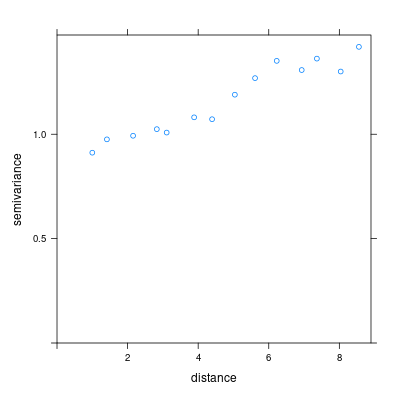  
~~~<IPython.core.display.Image object>~~~  


- Affichez la nuée variographique associée

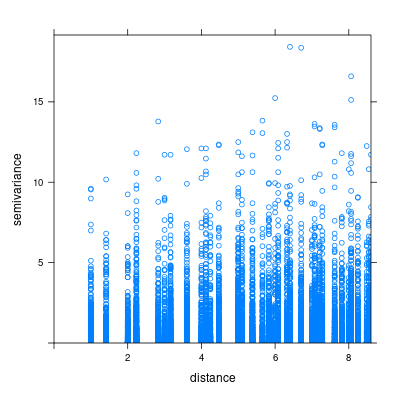

In [ ]:
# Résultat attendu ci-dessous...

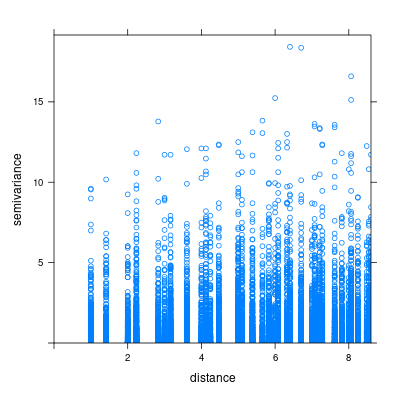  
~~~<IPython.core.display.Image object>~~~  


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.2 Construire un modèle variographique théorique et l'ajuster</b>
</div>

- Proposez un modèle variographique et comparez-le au variogramme expérimental, testez plusieurs types de modèles adaptés à l'aide de la fonction <code>vgm</code>

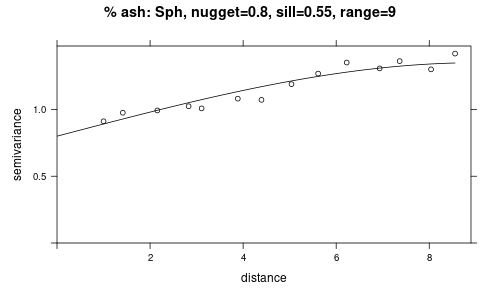

In [ ]:
# Résultat attendu ci-dessous...

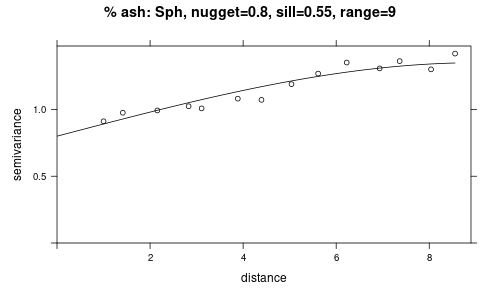  
~~~<IPython.core.display.Image object>~~~  


- Ajustez un modèle variographique au variogramme expérimental à l'aide de la fonction <code>fit.variogram</code>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Examinez ce que fait la fonction <i>fit.variogram</i> du <b>package</b> <i>gstat</i>
</div>

In [15]:
%%R
? fit.variogram()

File: /tmp/Rtmp3ZC8Pc/Rtxt9f023e9635b6
fit.variogram              package:gstat               R Documentation



Fit a Variogram Model to a Sample Variogram



Description:



     Fit ranges and/or sills from a simple or nested variogram model to

     a sample variogram



Usage:



     fit.variogram(object, model, fit.sills = TRUE, fit.ranges = TRUE,

             fit.method = 7, debug.level = 1, warn.if.neg = FALSE, fit.kappa = FALSE)

     

Arguments:



  object: sample variogram, output of variogram



   model: variogram model, output of vgm; see Details below for details

          on how ‘NA’ values in ‘model’ are initialised.



fit.sills: logical; determines whether the partial sill coefficients

          (including nugget variance) should be fitted; or logical

          vector: determines for each partial sill parameter whether it

          should be fitted or fixed.



fit.ranges: logical; determines whether the range coefficients

          (excluding that of the nu

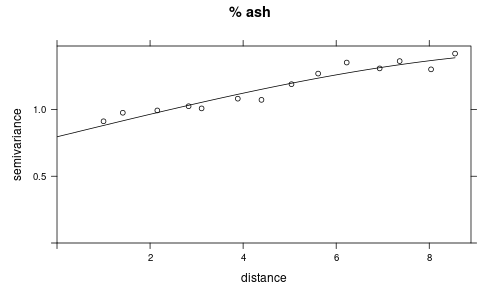

In [ ]:
# Résultat attendu ci-dessous...

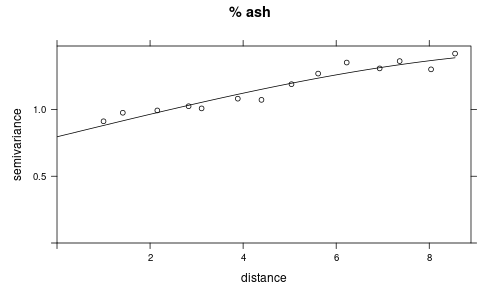  
~~~<IPython.core.display.Image object>~~~  


- Comparez ces résultats à ceux obtenus avec le jeu de données initial (avec le déviant)

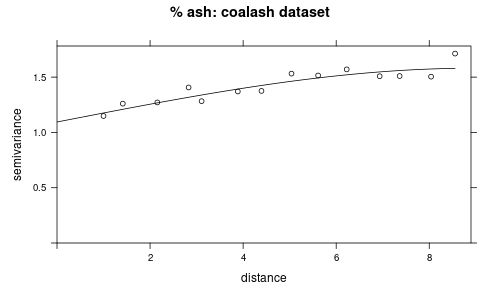

In [ ]:
# Résultat attendu ci-dessous...

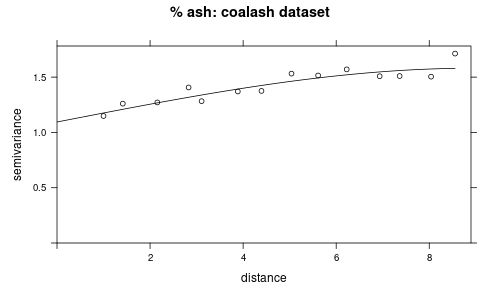  
~~~<IPython.core.display.Image object>~~~  


- Représentez dans <code>Python</code> les deux variogrammes expérimentaux sur un même graphe

(0.0, 2.0)

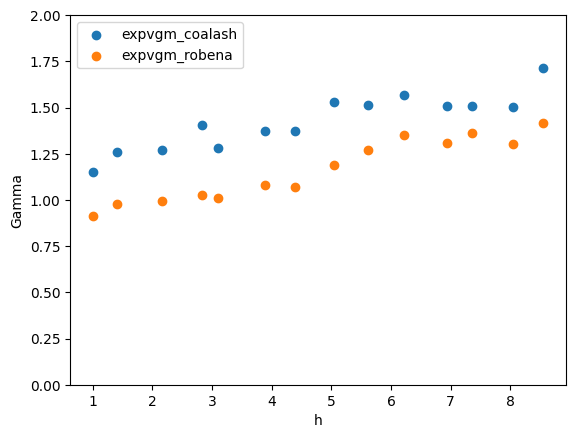

In [ ]:
# Résultat attendu ci-dessous...

~~~(0.0, 2.0)~~~  
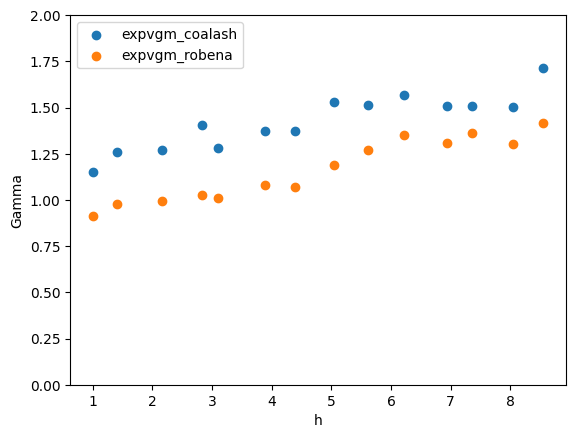  
~~~<Figure size 640x480 with 1 Axes>~~~  


***
## 5. Résoudre les équations du krigeage et afficher les résultats sur la grille

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le résultat d'un krigeage ne se résume pas uniquement à l'estimation d'une/de ReV sur la grille. Sauvegardez les futurs résultats sous la forme d'une image géoréférencée multi-bandes.
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>5.1 Préparation de l'affichage des résultats</b>
</div>

- Voici une fonction **plot_krige_results** qui affiche les résultats d'un krigeage stockée dans une image géoréférencée multi-bandes sous forme de deux cartes en vis-à-vis et en y superposant les points d'échantillonnage.

In [19]:
def plot_krige_results(image_file, gdf, **kwargs):
    """Plot the prediction and variance maps of a kriging result from a multiband raster layer"""
    fig, ax = plt.subplots(figsize=(20,10), ncols=2)
    cmaps = kwargs.pop('cmaps', ['hsv', 'hot'])
    ax_titles = kwargs.pop('titles', ['predictions', 'variance'])
    fig_title = kwargs.pop('fig_title', image_file[:-4])
    fig.suptitle(fig_title, fontsize=20)
    data = [None, None]
    im = [None, None]
    with rio.open(image_file, 'r') as out:
        spatial_extent = [out.bounds.left, out.bounds.right, out.bounds.bottom, out.bounds.top]
        for i in range(2):
            data[i] = out.read(i+1, masked=True)
    for i in range(2):
        im[i] = ax[i].imshow(data[i], cmap=cmaps[i], extent=spatial_extent, **kwargs)
        ax[i].set_title(ax_titles[i])
        gdf.plot(ax=ax[i], marker='x', color='grey')
        fig.colorbar(im[i], ax=ax[i])  
    if fig_title!='':
        plt.savefig(fig_title+'.png')

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.2 Préparation des outils pour le krigeage</b>
</div>

- gstat nécessite une grille qui soit un objet de la classe **SpatialPixelsDataFrame**. Importez dans l'environnement <code>R</code> le fichier robena_estimation_grid.tif avec la librairie <b>Raster</b>. Convertissez ensuite la grille en **SpatialPixelsDataFrame** puis spécifiez le CRS : <code>+proj=merc +nodefs</code>.

In [ ]:
# Résultat attendu ci-dessous...

class      : RasterLayer 
dimensions : 260, 189, 49140  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : -1, 17.9, -1, 25  (xmin, xmax, ymin, ymax)
crs        : +proj=merc +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : robena_estimation_grid.tif 
names      : robena_estimation_grid 



<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.3 Krigeage ordinaire</b>
</div>

- Résolvez les équations du krigeage ordinaire et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [21]:
%%R
? krige

File: /tmp/Rtmp3ZC8Pc/Rtxt9f02547d8c15
krige                  package:gstat                   R Documentation



Simple, Ordinary or Universal, global or local, Point or Block Kriging,

or simulation.



Description:



     Function for simple, ordinary or universal kriging (sometimes

     called external drift kriging), kriging in a local neighbourhood,

     point kriging or kriging of block mean values (rectangular or

     irregular blocks), and conditional (Gaussian or indicator)

     simulation equivalents for all kriging varieties, and function for

     inverse distance weighted interpolation.  For multivariable

     prediction, see gstat and predict



Usage:



     krige(formula, locations, ...)

     krige.locations(formula, locations, data, newdata, model, ..., beta, nmax

     = Inf, nmin = 0, omax = 0, maxdist = Inf, block, nsim = 0, indicators = FALSE,

     na.action = na.pass, debug.level = 1)

     krige.spatial(formula, locations, newdata, model, ..., beta, nmax

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


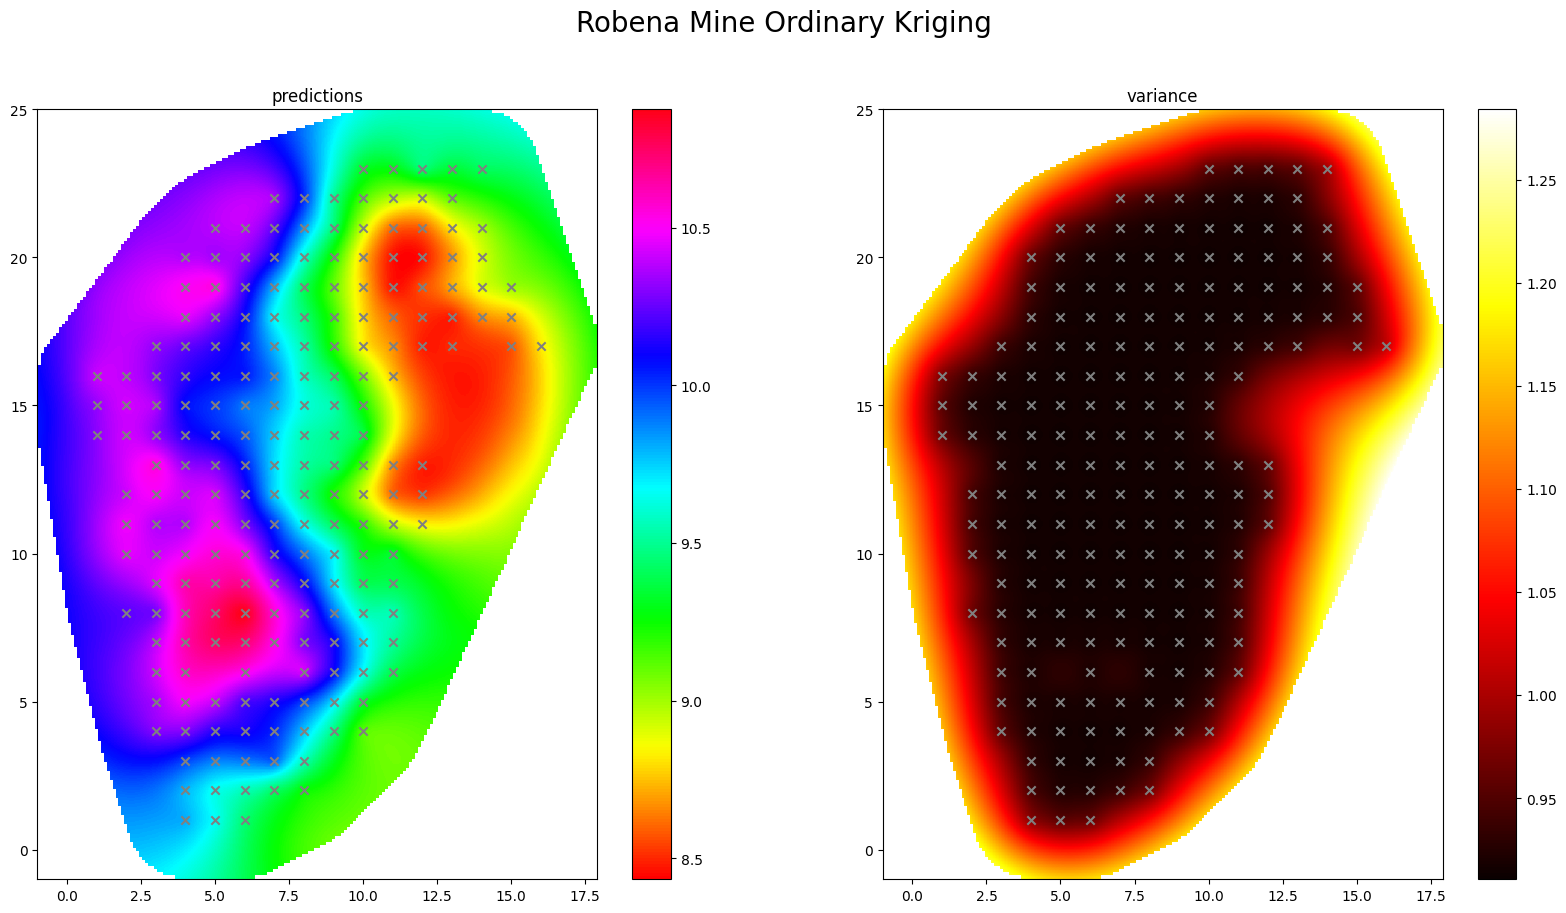

In [ ]:
# Résultat attendu ci-dessous...

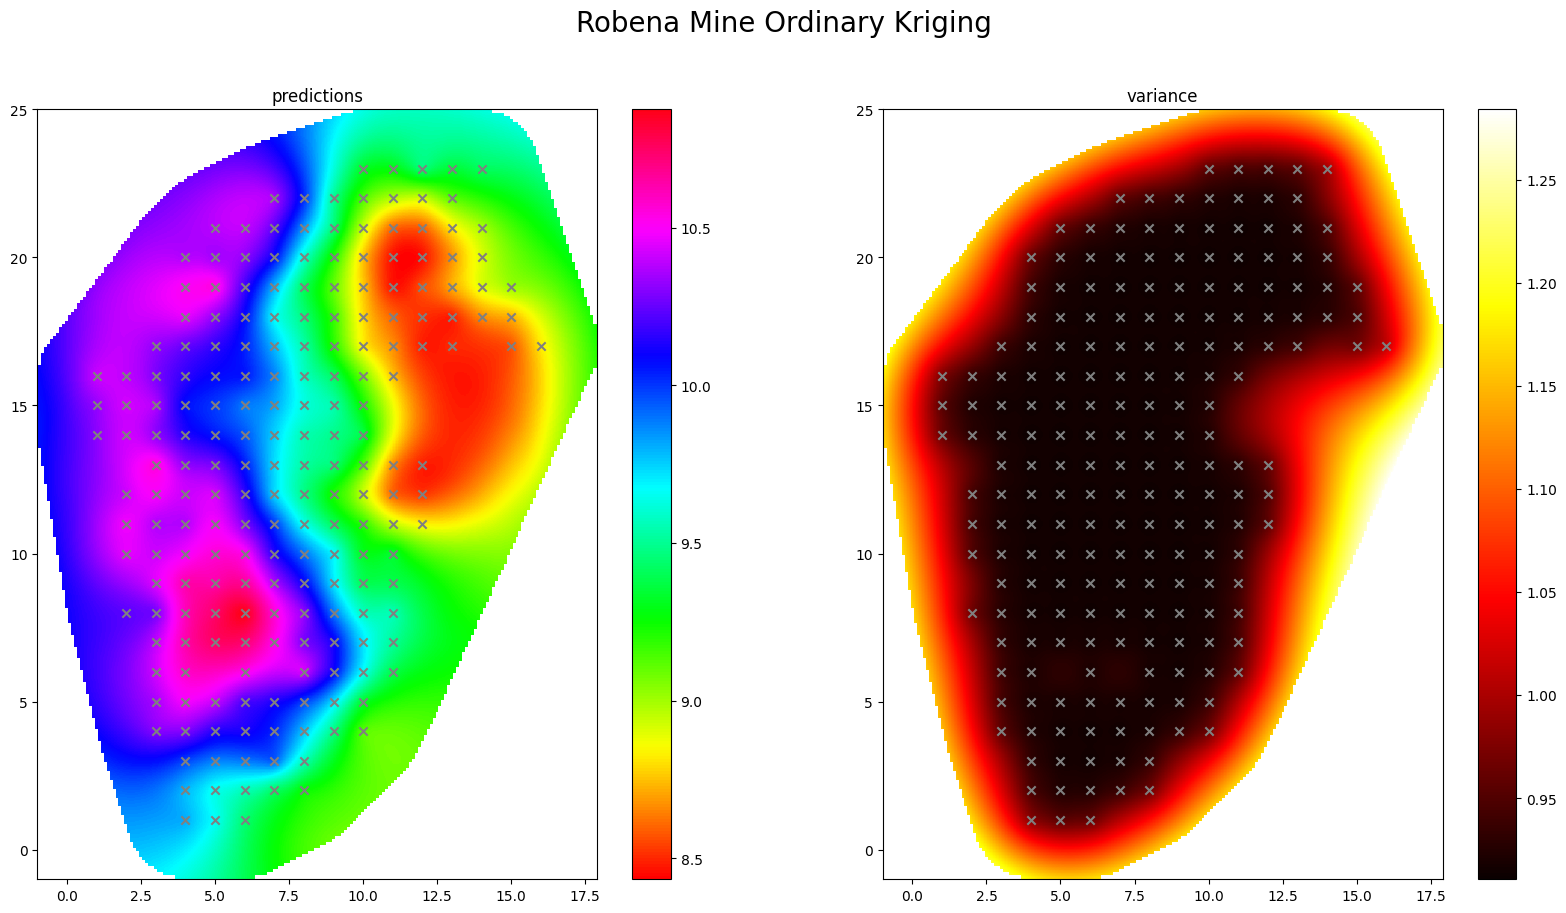  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.4 Krigeage simple</b>
</div>

- Résolvez les équations du krigeage simple et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[1] "La moyenne des teneurs en cendres du jeu de données est de: 9.74072463768116 %"
[using simple kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


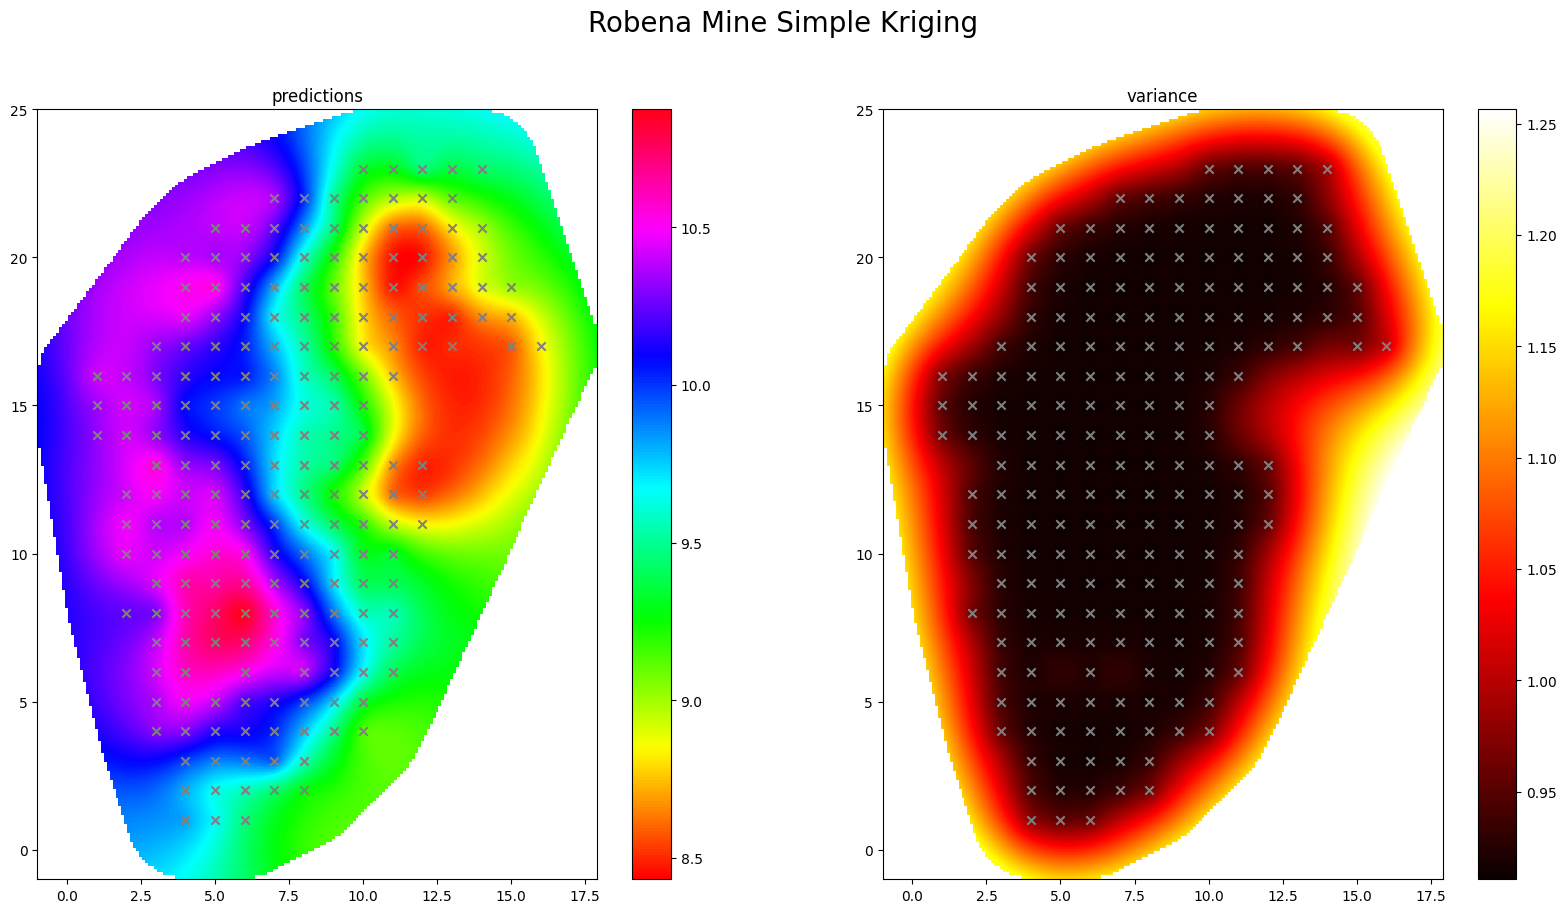

In [ ]:
# Résultat attendu ci-dessous...

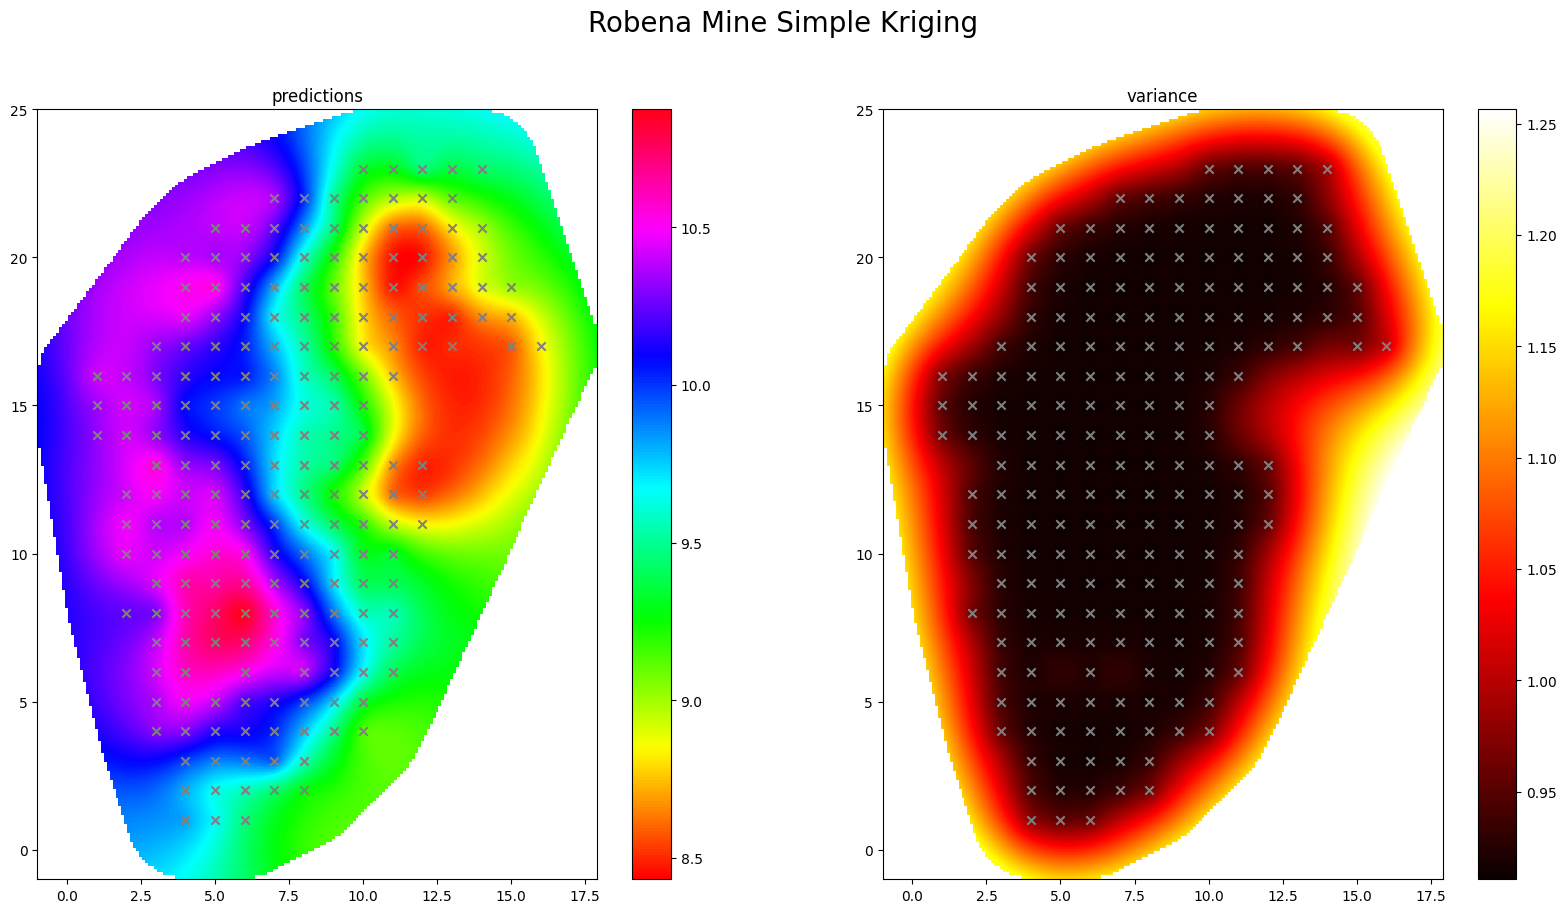  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


- Calculez la différence entre le krigeage simple et le krigeage ordinaire et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [26]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2525523c62723e0a203c62723e0a3c62723e0a726f62656e612e6b7269676524646966662e70726564203c2d20726f62656e612e6b7269676573696d706c6524766172312e70726564202d20726f62656e612e6b7269676524766172312e707265643c62723e0a726f62656e612e6b7269676524646966662e766172203c2d20726f62656e612e6b7269676573696d706c6524766172312e766172202d20726f62656e612e6b7269676524766172312e7661723c62723e0a3c62723e0a696d6167655f66696c65203c2d20272e2f726f62656e615f736b5f6f6b5f646966662e746966273c62723e0a726f62656e615f736b5f6f6b5f64696666203c2d20737461636b28617328726f62656e612e6b726967655b27646966662e70726564275d2c20225261737465724c6179657222292c20617328726f62656e612e6b726967655b27646966662e766172275d2c20225261737465724c617965722229293c62723e0a777269746552617374657228726f62656e615f736b5f6f6b5f646966662c20696d6167655f66696c652c206f76657277726974653d54525545293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)
/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


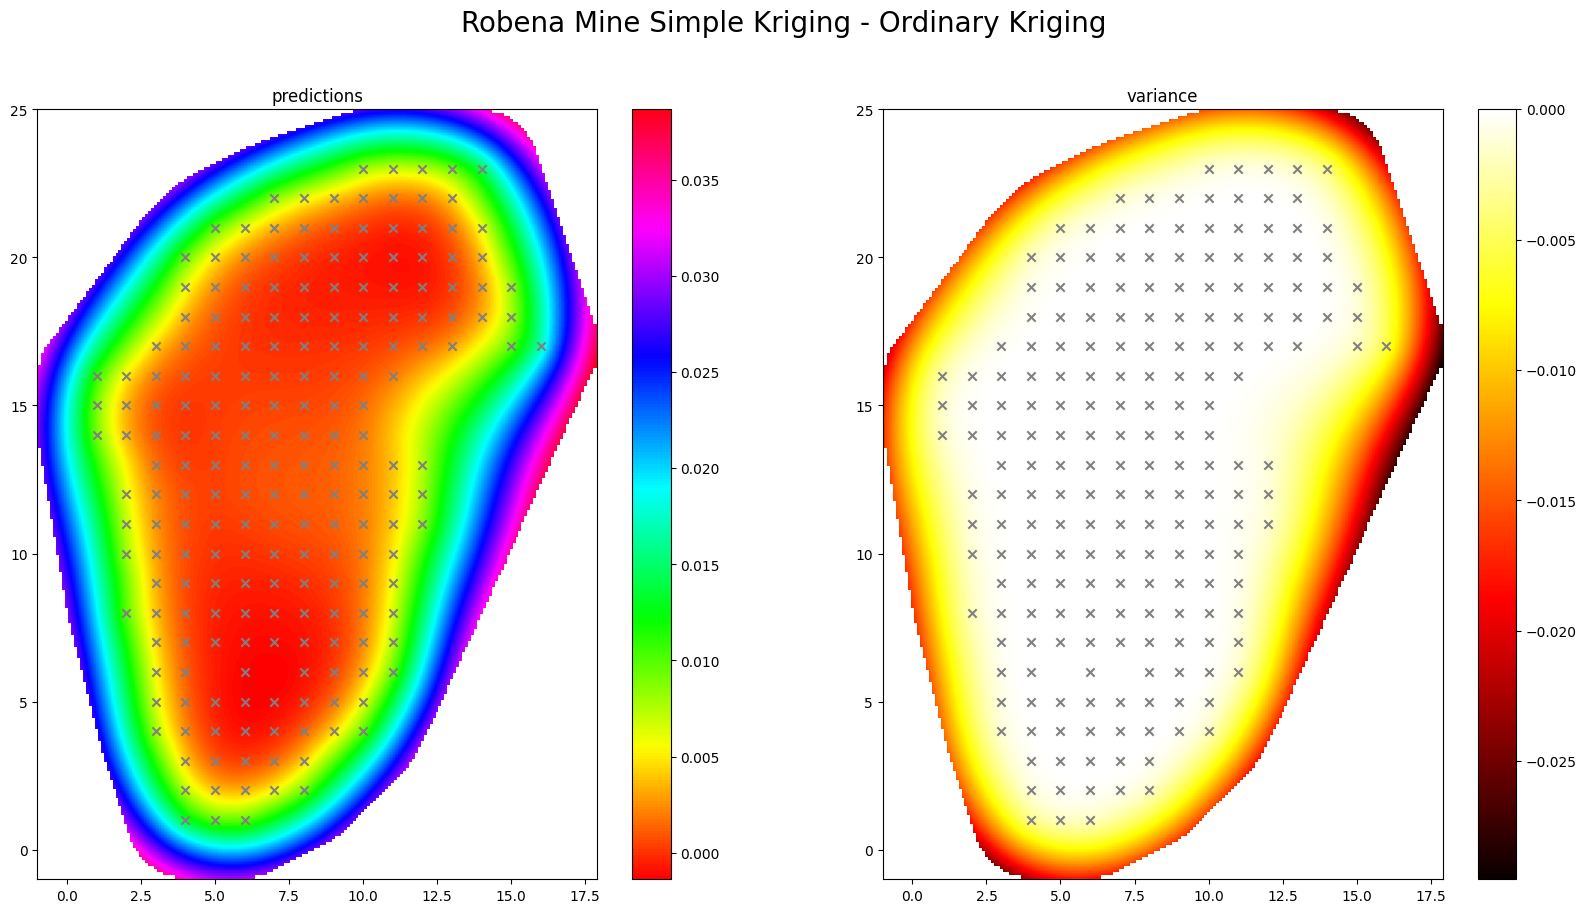

In [ ]:
# Résultat attendu ci-dessous...

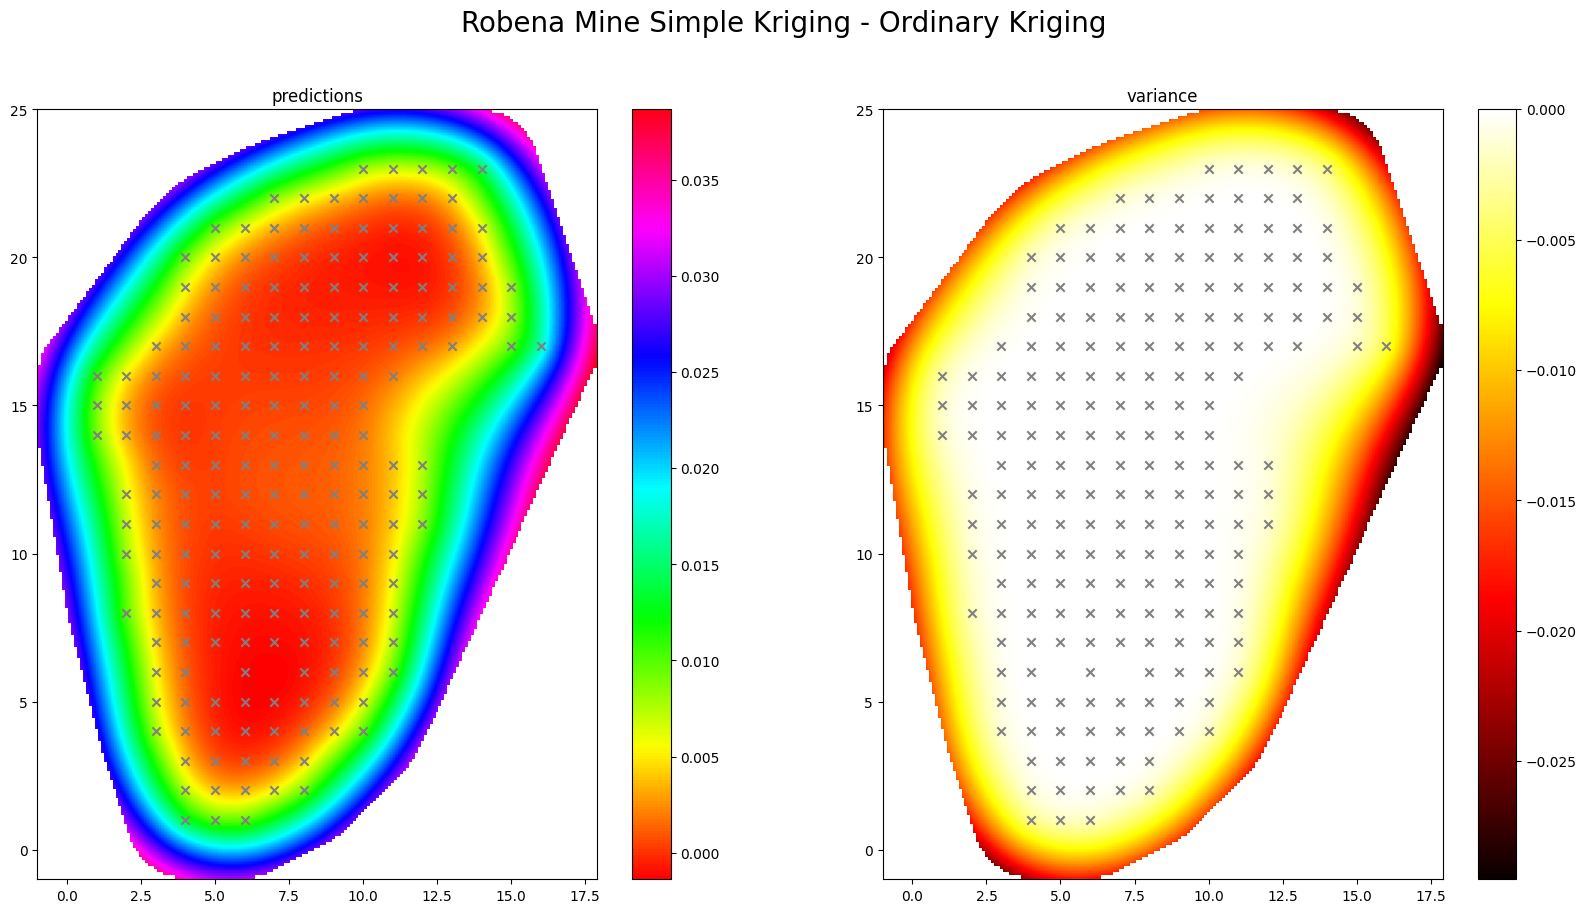  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.5 Krigeage par bloc</b>
</div>

- Résolvez les équations du krigeage ordinaire par blocs pour des blocs de 2x2 et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


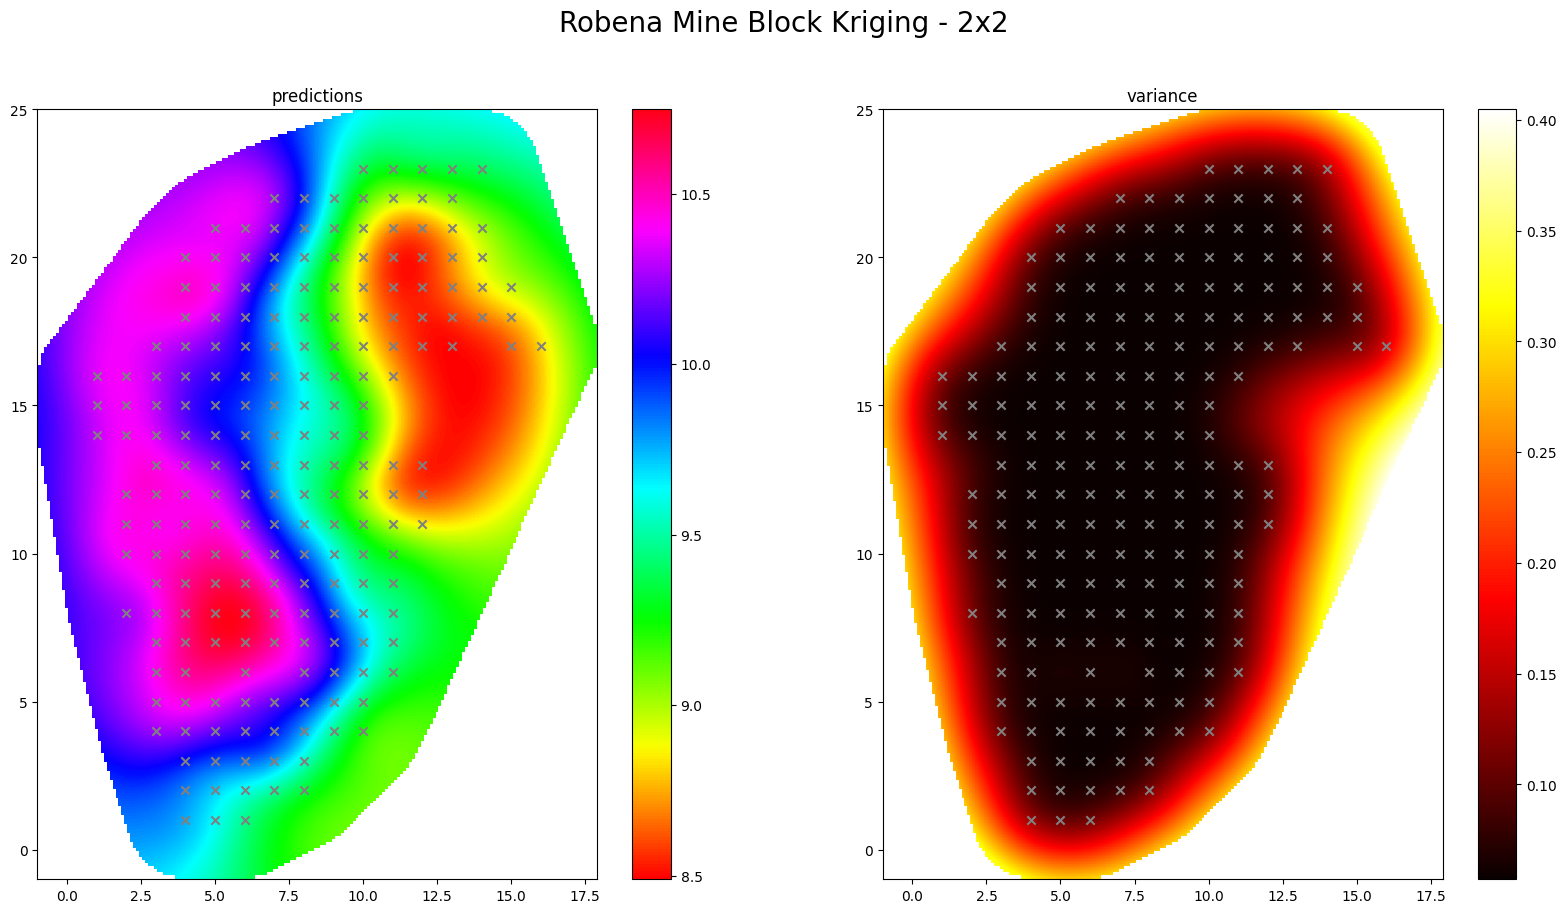

In [ ]:
# Résultat attendu ci-dessous...

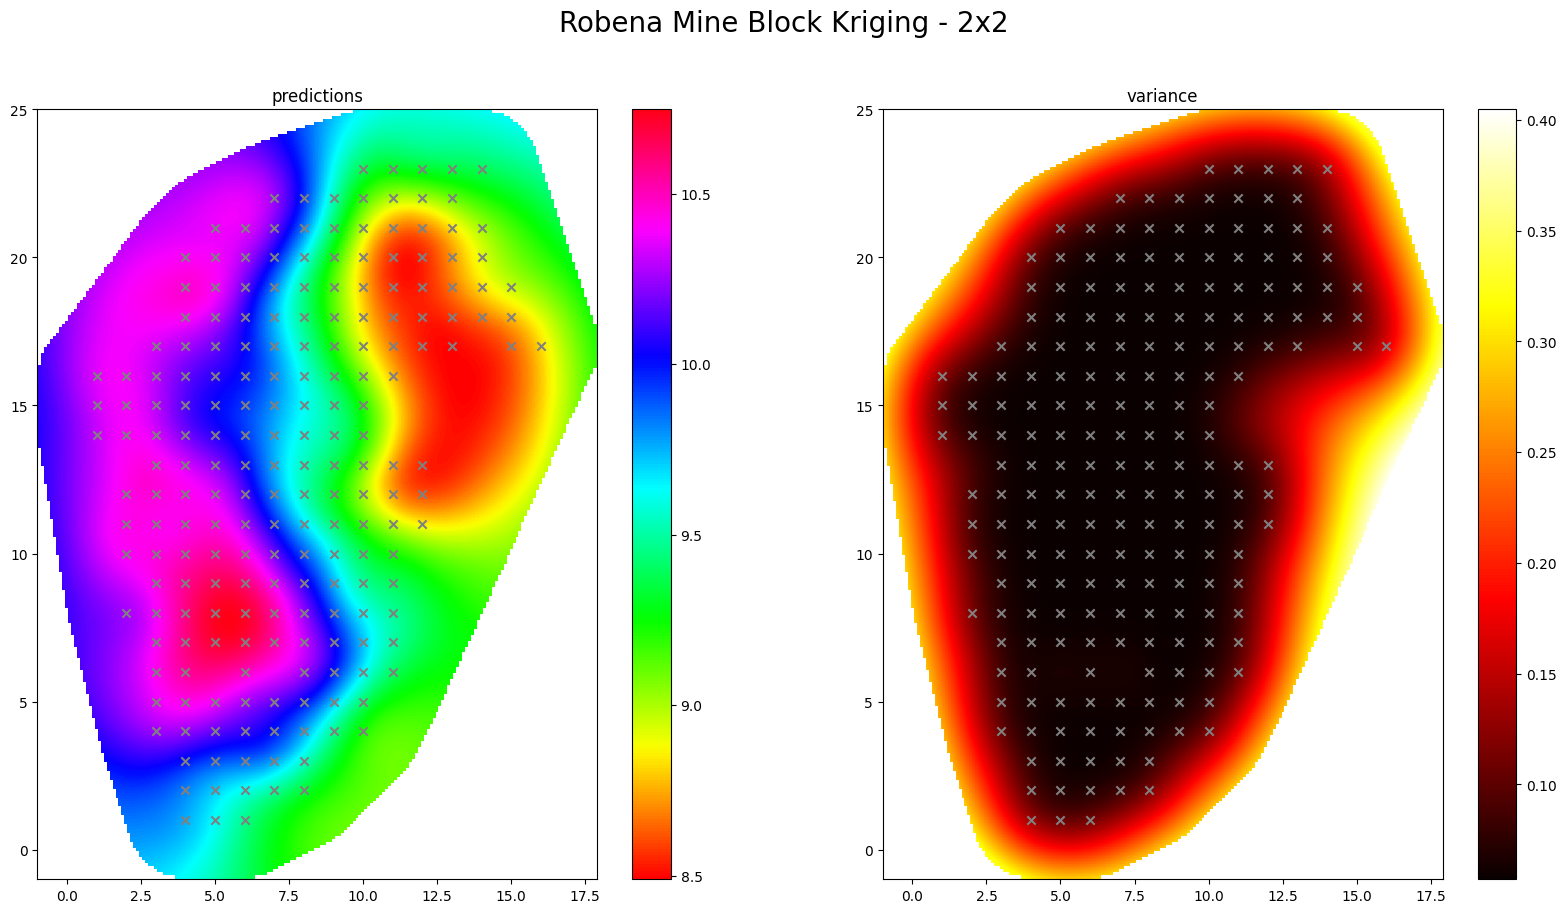  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


- Résolvez les équations du krigeage ordinaire par blocs pour des blocs de 1x4 et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


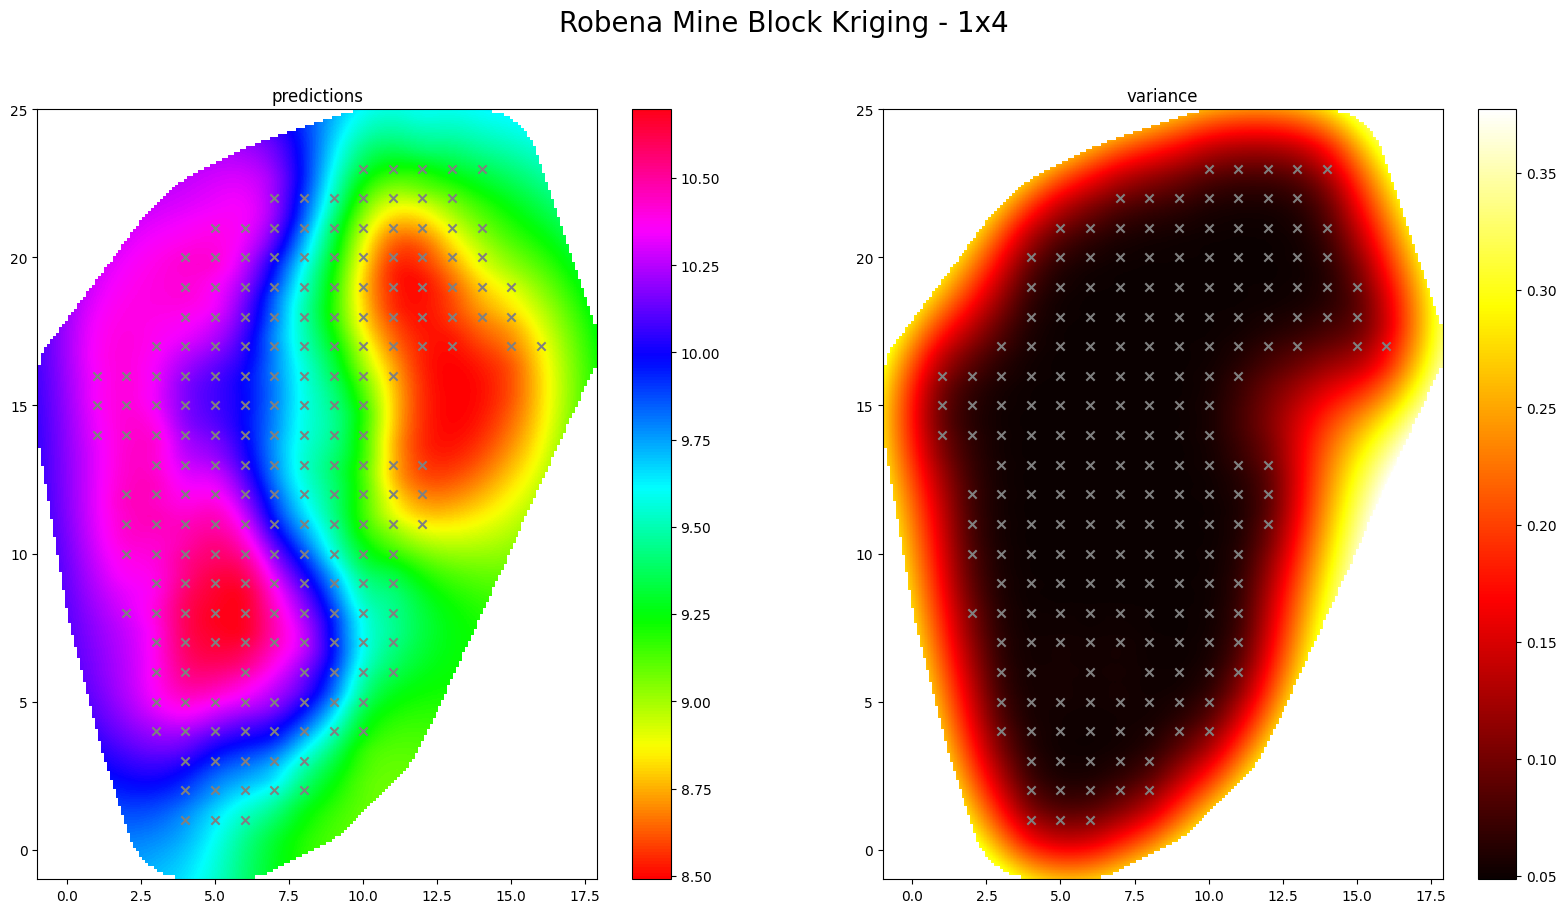

In [ ]:
# Résultat attendu ci-dessous...

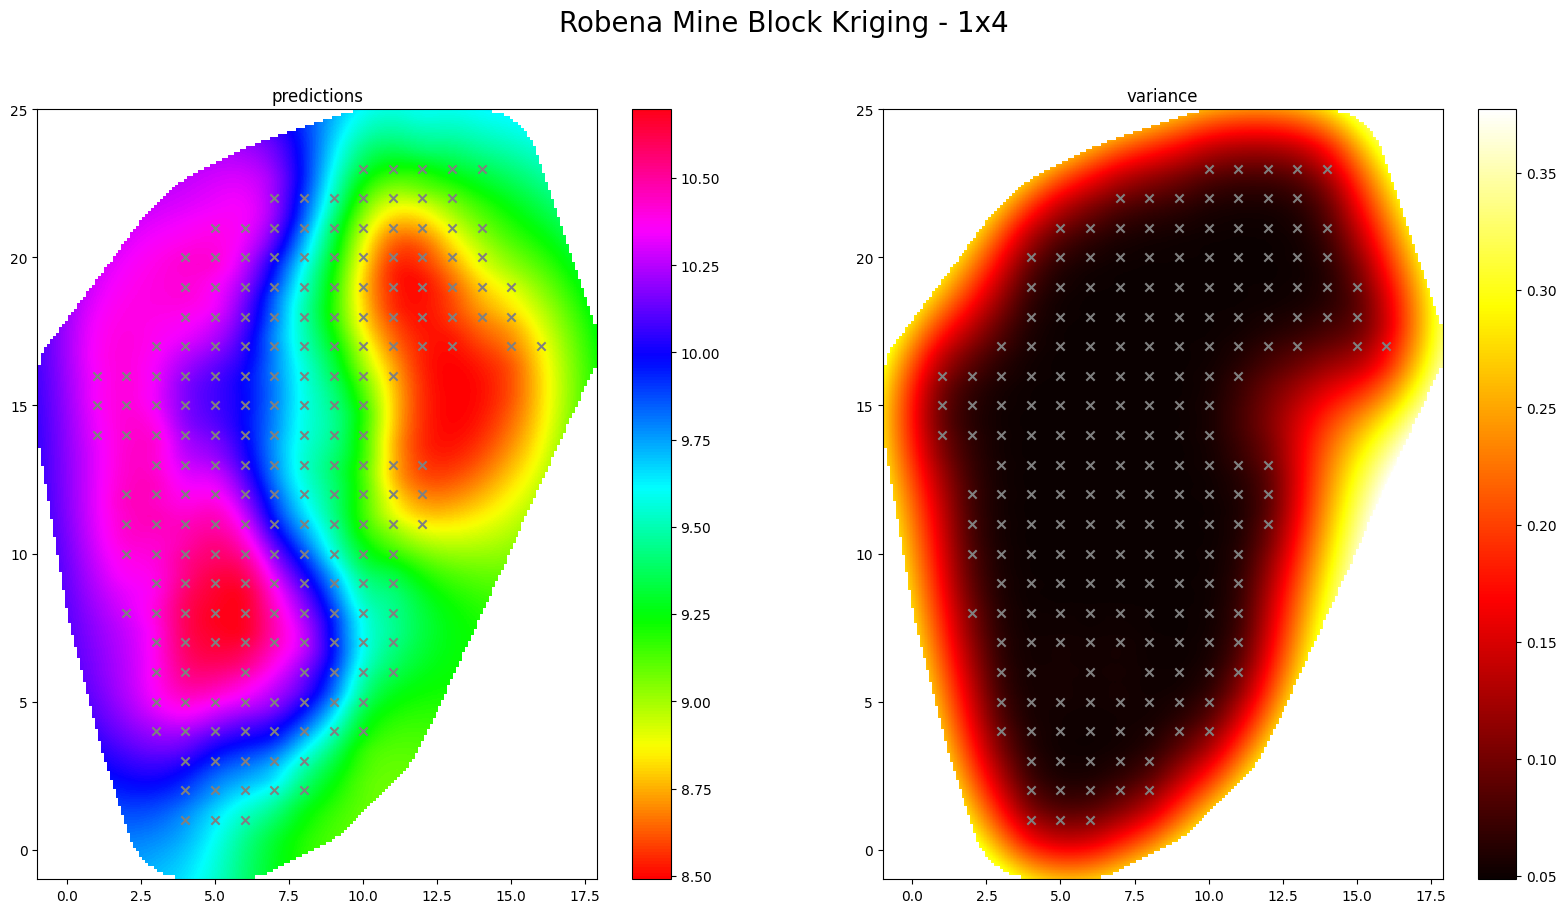  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


<div class="alert alert-block alert-warning">
<b>Question 5.5.1: </b><br>Quelles différences voyez-vous entre le krigeage ordinaire, le krigeage ordinaire par blocs de 2x2 et celui par blocs de 1x4?
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.6 Krigeage universel</b>
</div>

- Résolvez les équations du krigeage universel avec une tendance linéaire sur x et y et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using universal kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


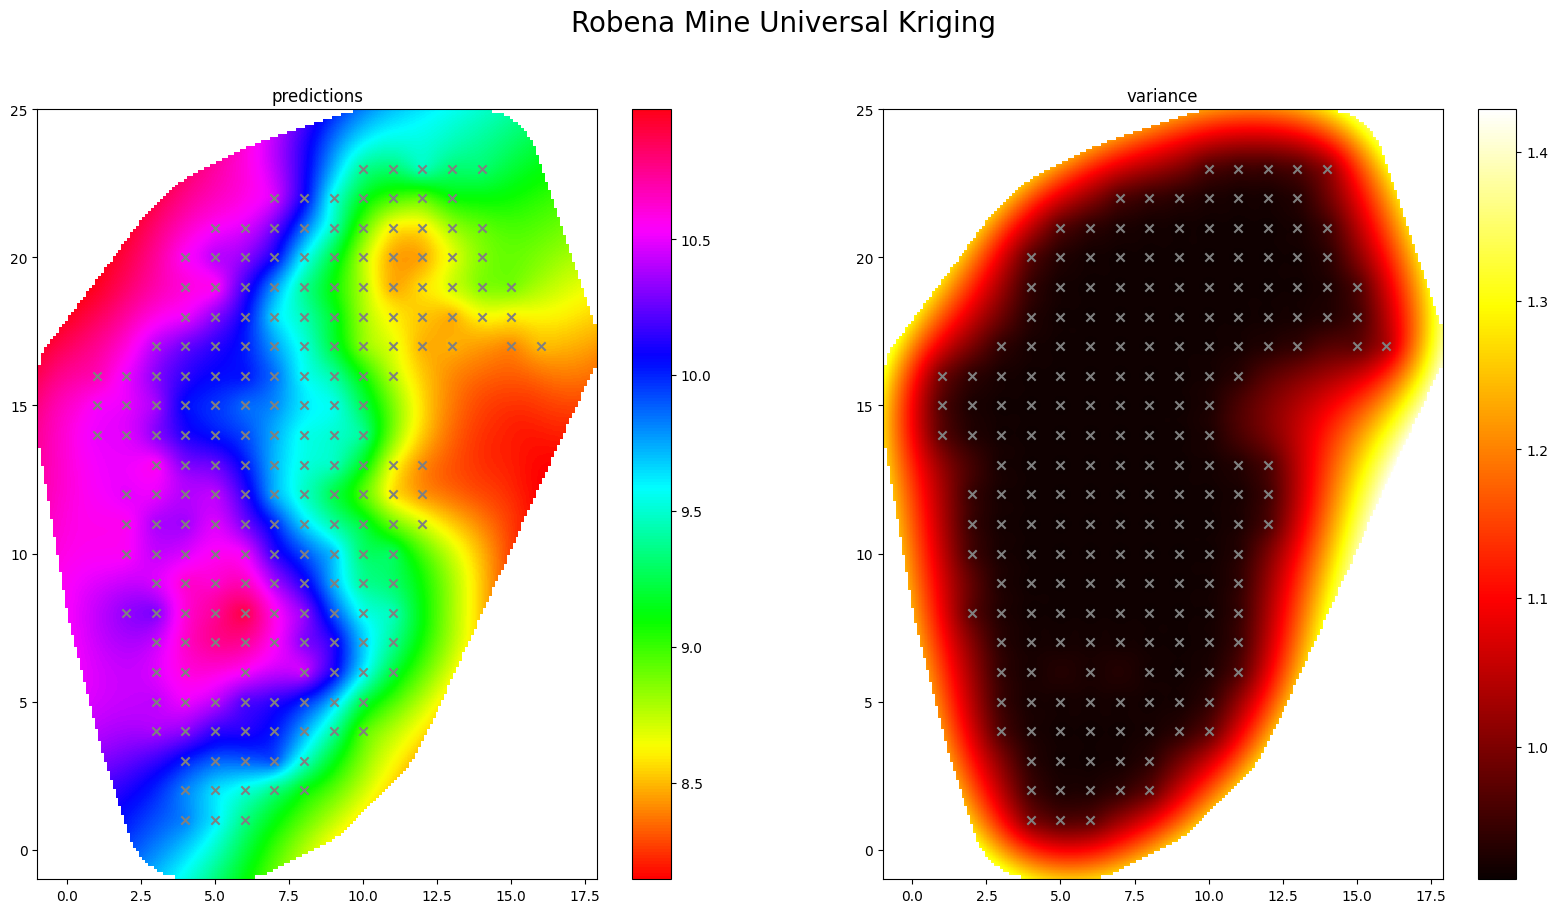

In [ ]:
# Résultat attendu ci-dessous...

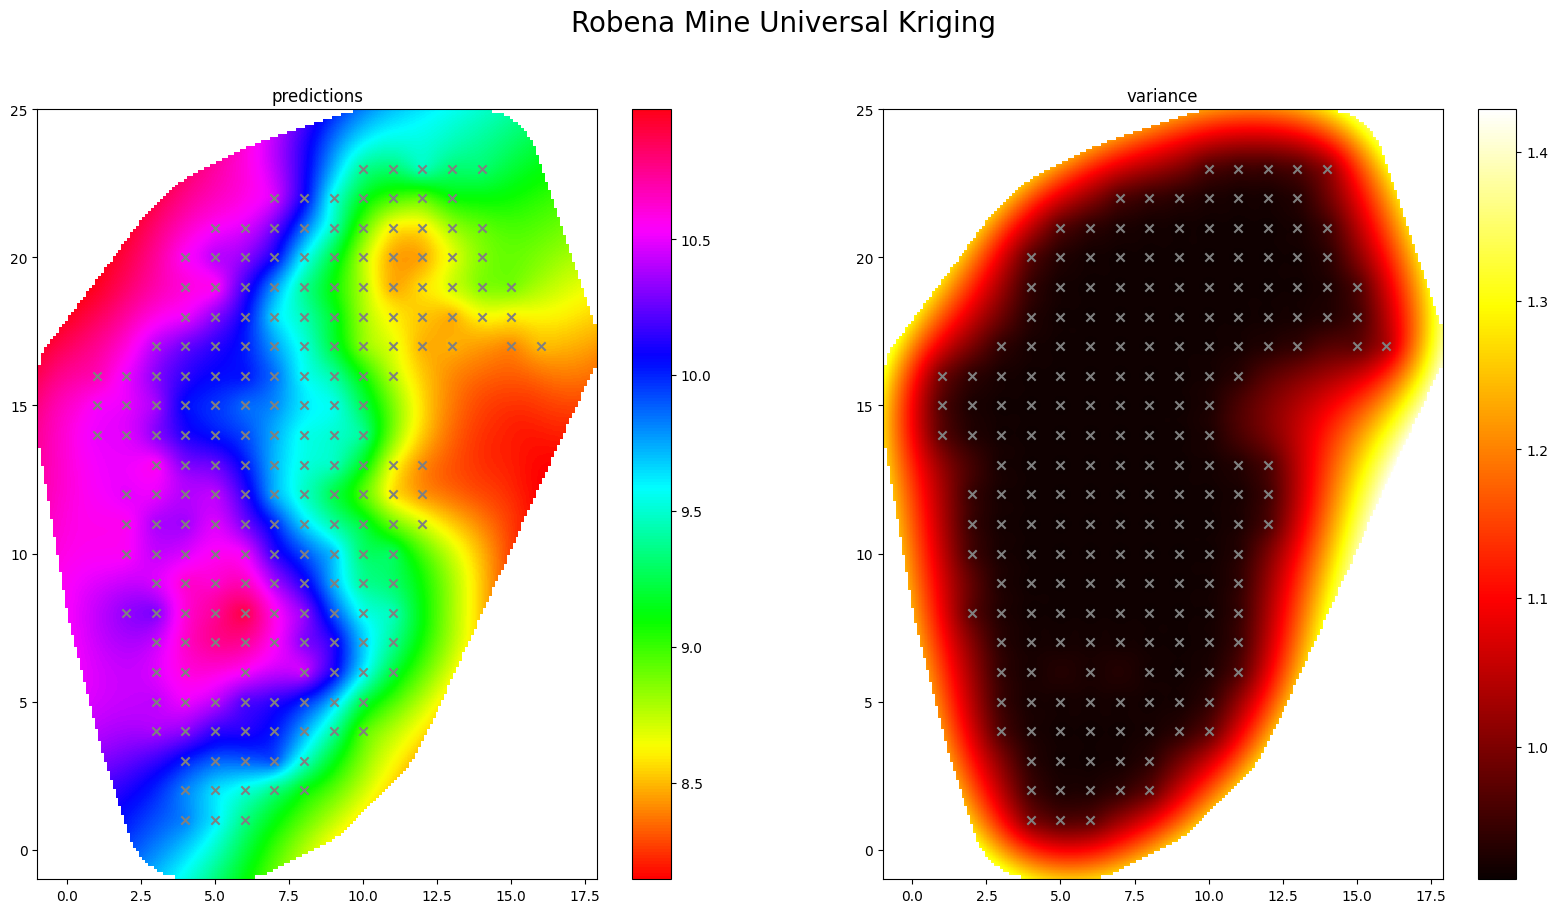  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


- Calculez la différence entre le krigeage universel et le krigeage ordinaire et représentez-la sous forme de cartes

- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


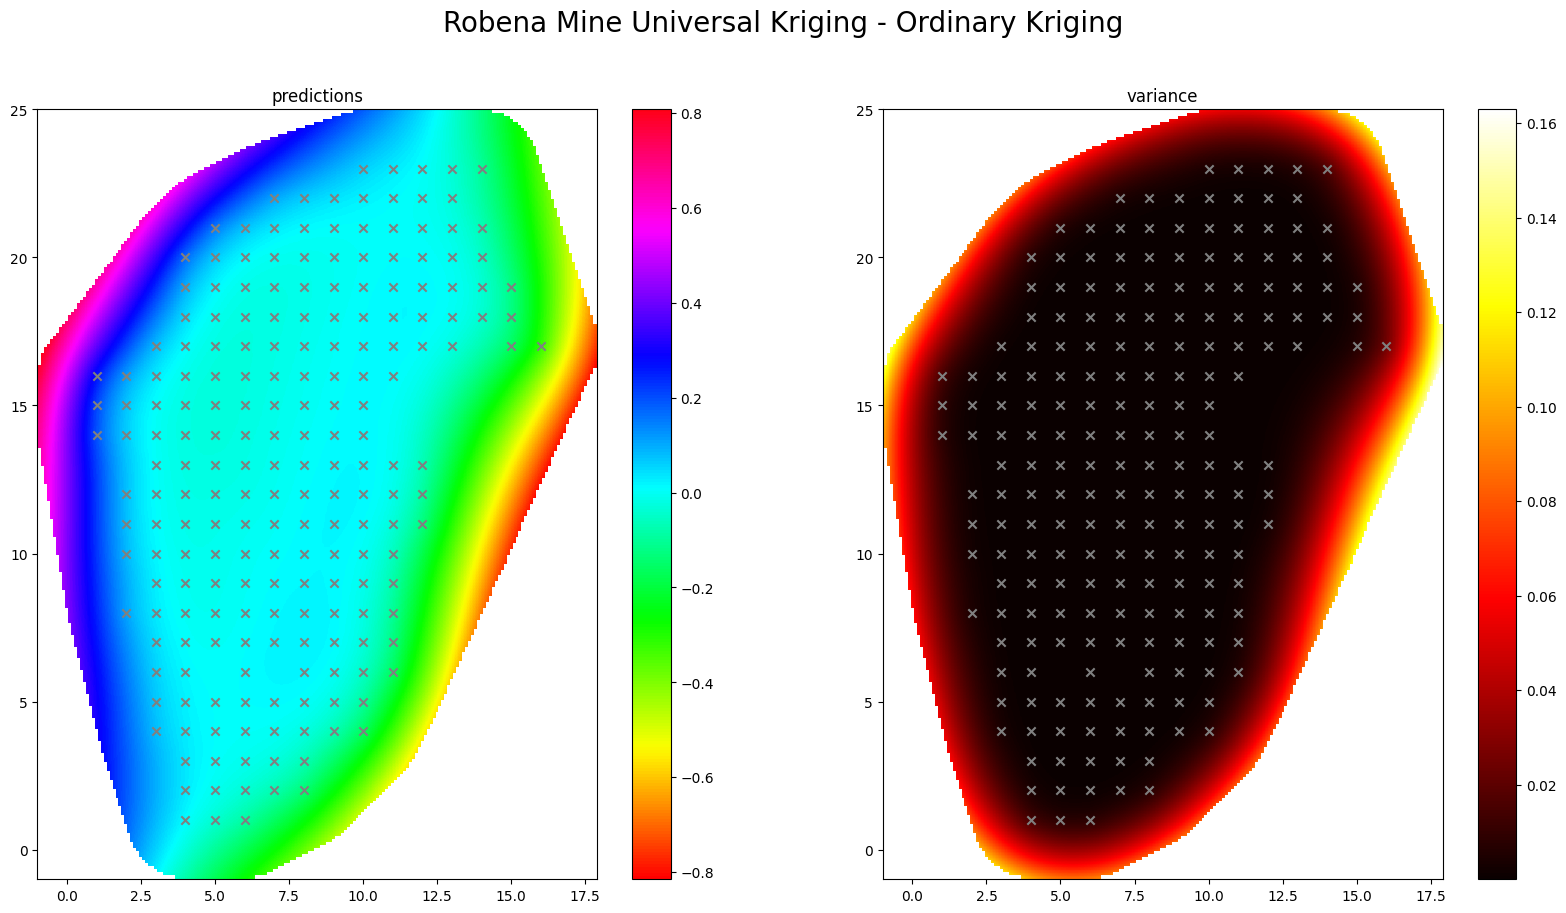

In [ ]:
# Résultat attendu ci-dessous...

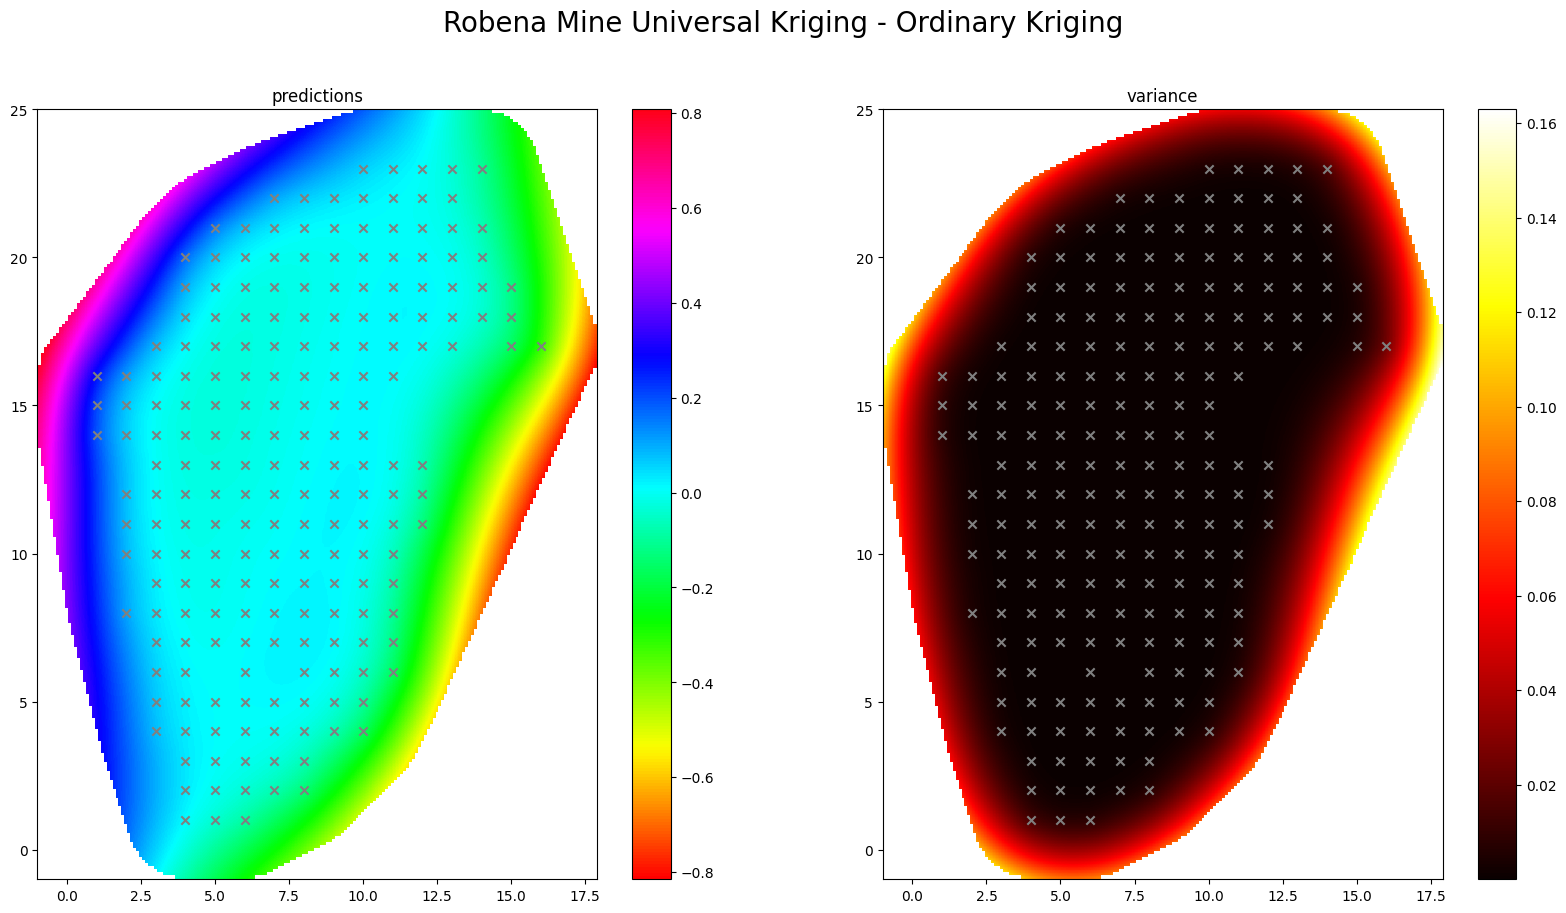  
~~~<Figure size 2000x1000 with 4 Axes>~~~  


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.7 Vérifier la qualité des estimations avec la validation croisée</b>
</div>

<b>Note:</b><br>    La validation croisée vue au cours s'appelle **Leave-One-Out Cross-Validation** (**LOOCV**). Il existe aussi d'autres stratégies de validation croisée.


- Effectuez une validation croisée pour l'estimation par krigeage ordinaire à l'aide de la fonction <code>krige.cv</code>

In [ ]:
# Résultat attendu ci-dessous...

  |======================================================================| 100%
class       : SpatialPointsDataFrame 
features    : 207 
extent      : 1, 16, 1, 23  (xmin, xmax, ymin, ymax)
crs         : +proj=merc +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
variables   : 6
names       :        var1.pred,          var1.var, observed,          residual,            zscore, fold 
min values  : 8.37305036778665, 0.928084259314494,        7, -2.41442936876109, -2.48101335821851,    1 
max values  :  10.803652009706,   1.0911609650705,    13.07,  3.16945785006287,  3.27609923254456,  207 


- Affichez la distribution spatiale des résidus calculés par validation croisée

In [40]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e646566207363616c655f73796d626f6c7328782c20613d3530293a3c62723e0a2020202072657475726e206e702e61627328612a78293c62723e0a3c62723e0a64656620636f6c6f725f73796d626f6c7328782c20706f7369746976655f636f6c6f723d2767272c206e656761746976655f636f6c6f723d276d27293a3c62723e0a2020202072657475726e206e702e6172726179285b6e656761746976655f636f6c6f722069662069203c302e20656c736520706f7369746976655f636f6c6f7220666f72206920696e20785d293c62723e0a3c62723e0a4d203d20352023206e756d626572206f662062696e733c62723e0a62696e73203d205b6e702e7175616e74696c652863765f6f6b2e726573696475616c2c20692f284d2d31292920666f72206920696e2072616e676528302c4d295d3c62723e0a67726f75706564203d2063765f6f6b2e67726f75706279286e702e6469676974697a652863765f6f6b2e726573696475616c2c2062696e7329293c62723e0a203c62723e0a232043726561746520736f6d652073697a65732c206c6162656c7320616e6420736f6d6520636f6c6f72733c62723e0a73697a6573203d205b7363616c655f73796d626f6c7328692920666f72206920696e2062696e735d3c62723e0a6c6162656c73203d205b66277b693a2b2e33667d20252720666f72206920696e2062696e735d3c62723e0a636f6c6f7273203d20636f6c6f725f73796d626f6c732862696e73293c62723e0a203c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28362c3629293c62723e0a232067657420746865206c6567656e642068616e646c657320616e64206c6162656c733c62723e0a666f7220692c20286e616d652c2067726f75702920696e20656e756d65726174652867726f75706564293a3c62723e0a2020202061782e736361747465722867726f75702e782c2067726f75702e792c20733d73697a65735b695d2c20616c7068613d312e2c2020633d636f6c6f72735b695d2c206c6162656c3d6c6162656c735b695d293c62723e0a68616e646c65732c206c6162656c73203d2061782e6765745f6c6567656e645f68616e646c65735f6c6162656c7328293c62723e0a61782e636c65617228293c62723e0a3c62723e0a2320706c6f74207468652061637475616c20726573696475616c733c62723e0a61782e736361747465722863765f6f6b2e782c2063765f6f6b2e792c20733d7363616c655f73796d626f6c732863765f6f6b2e726573696475616c292c20633d636f6c6f725f73796d626f6c732863765f6f6b2e726573696475616c29293c62723e0a3c62723e0a23207365742061737065637420726174696f2c207469746c6520616464206c6567656e643c62723e0a61782e617869732827657175616c27293c62723e0a61782e7365745f7469746c65282763726f73732d76616c69646174696f6e20726573696475616c7327293c62723e0a6669672e6c6567656e642868616e646c65732c206c6162656c732c206c6f633d2763656e746572206c656674272c2062626f785f746f5f616e63686f723d28312c20302e3529293b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


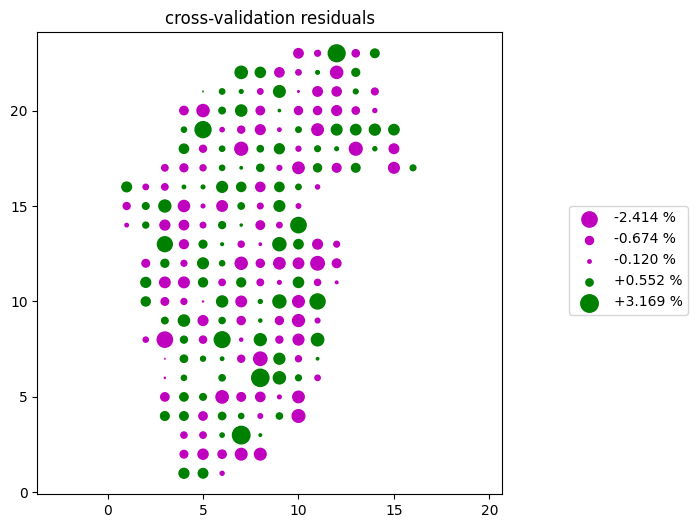

In [ ]:
# Résultat attendu ci-dessous...

- Affichez la distribution spatiale des erreurs standardisées calculées par validation croisée

In [41]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e4d203d20382023206e756d626572206f662062696e733c62723e0a62696e73203d205b6e702e7175616e74696c652863765f6f6b2e7a73636f72652c20692f284d2d31292920666f72206920696e2072616e676528302c4d295d3c62723e0a67726f75706564203d2063765f6f6b2e67726f75706279286e702e6469676974697a652863765f6f6b2e7a73636f72652c2062696e7329293c62723e0a6c6162656c73203d205b66277b693a2b2e33667d2720666f72206920696e2062696e735d3c62723e0a636f6c6f7273203d205b6920666f72206920696e2062696e735d3c62723e0a3c62723e0a66726f6d206d6174706c6f746c69622e636d20696d706f7274206765745f636d61703c62723e0a636d6170203d206765745f636d6170282762777227293c62723e0a3c62723e0a3c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28382c3629293c62723e0a666f7220692c20286e616d652c2067726f75702920696e20656e756d65726174652867726f75706564293a3c62723e0a2020202061782e736361747465722867726f75702e782c2067726f75702e792c20616c7068613d312e2c20633d636d6170285b28692d62696e735b305d292f2862696e735b2d315d2d62696e735b305d2920666f72206920696e2067726f75702e7a73636f72655d292c20636d61703d636d61702c206c6162656c3d6c6162656c735b695d293c62723e0a68616e646c65732c206c6162656c73203d2061782e6765745f6c6567656e645f68616e646c65735f6c6162656c7328293c62723e0a61782e636c65617228293c62723e0a61782e736361747465722878203d2063765f6f6b2e782c2079203d2063765f6f6b2e792c20633d63765f6f6b2e7a73636f72652c20636d61703d636d6170293c62723e0a61782e617869732827657175616c27293c62723e0a61782e7365745f7469746c65282763726f73732d76616c69646174696f6e207a2d73636f726527293c62723e0a6669672e6c6567656e642868616e646c65732c206c6162656c732c6c6f633d2763656e746572206c656674272c2062626f785f746f5f616e63686f723d28312c20302e3529293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


/tmp/ipykernel_40706/3523419510.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('bwr')
/tmp/ipykernel_40706/3523419510.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(group.x, group.y, alpha=1., c=cmap([(i-bins[0])/(bins[-1]-bins[0]) for i in group.zscore]), cmap=cmap, label=labels[i])


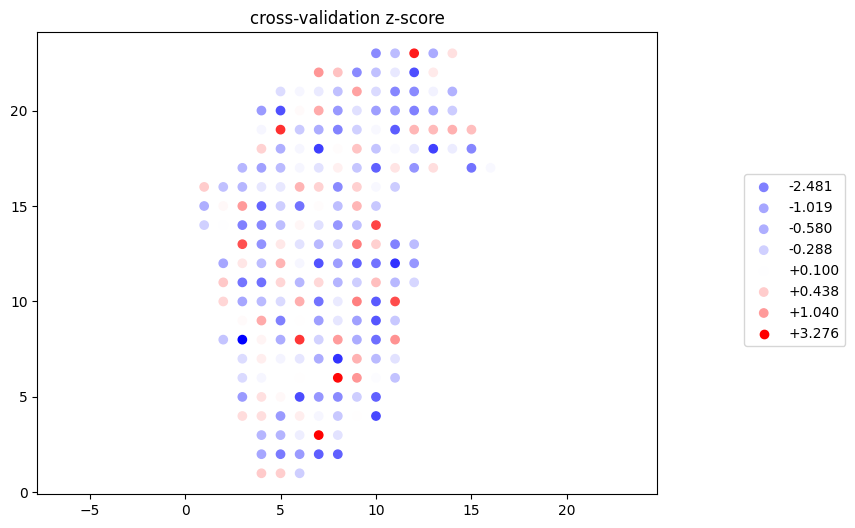

In [ ]:
# Résultat attendu ci-dessous...

- Calculez l'erreur quadratique moyenne, la moyenne de l’erreur de validation croisée et la moyenne des carrés des erreurs standardisées de validation
croisée

In [ ]:
# Résultat attendu ci-dessous...

Erreur quadratique moyenne : 0.9843 
Moyenne de l’erreur de validation croisée : 0.0004 
Moyenne des carrés des erreurs standardisées de validation croisée : 1.0264


***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA CINQUIEME SEANCE</b>
</div>

***
## 6. Pour aller plus loin

- Observez l'effet d'un changement de variogramme (choix du modèle, effet de pépite, du palier) sur les estimations et les variances d'estimation des différents krigeages

- Observez l'effet du changement de la valeur de la moyenne sur les estimations et les variances d'estimation du krigeage simple